<h1><b>Probelm 1</b></h1>

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
mf=loadmat('./annualrainfall.mat')

FileNotFoundError: [Errno 2] No such file or directory: '/content/annualrainfall.mat'

In [ ]:
df=pd.DataFrame(mf['XR'])
df.shape

(357, 118)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,0.719022,2.572195,5.115582,0.509786,0.600234,4.217397,3.394793,2.776336,5.246690,2.870923,0.503523,4.707903,3.800771,3.494681,1.560277,2.461354,2.701317,0.270279,2.062884,2.259700,1.837518,1.695163,0.891337,0.854337,1.827726,4.847644,2.800217,3.847423,2.081070,3.306721,2.417667,3.731251,7.151538,2.844002,4.890717,2.278504,3.929848,1.858640,0.324399,1.495916,...,7.481707,3.575909,3.301032,1.096881,2.905557,2.241415,1.392053,1.527247,0.003450,5.031575,3.171709,1.344220,0.241839,6.058672,0.720000,7.919068,2.463716,0.695989,2.266583,1.143928,0.591627,2.311478,3.516821,0.746042,5.536853,0.961111,1.408028,5.194789,3.860882,1.540279,6.960845,6.511054,4.486057,3.190908,2.053494,1.366868,2.746204,2.418939,3.602588,0.274935
1,0.799972,2.358573,4.459389,0.649587,1.078375,4.126520,3.245645,2.841028,4.584479,2.771173,0.390978,4.566814,4.507261,3.258758,1.418287,2.882883,2.850302,0.488714,2.139486,2.799668,2.684862,2.167462,0.905785,1.092895,1.734544,4.934780,3.256577,3.253268,2.133323,2.860312,1.970599,3.419194,5.856694,2.890147,4.364045,2.134818,3.339033,1.757293,0.357135,1.457707,...,7.112669,2.810458,2.755489,1.031630,2.927916,2.187569,0.968244,1.368849,0.000000,5.401890,3.259689,1.193876,0.167265,6.233572,1.099805,9.827084,2.312323,0.260047,2.006215,0.839951,0.563115,2.158197,2.668691,0.537310,6.654080,0.840984,1.400000,5.200000,3.824590,1.531967,6.964754,6.462295,3.483775,3.183151,1.549078,1.186168,2.879098,2.404098,2.857377,0.133504
2,1.116379,3.817571,5.715812,1.357004,1.584306,5.746037,4.469713,5.190642,5.284658,5.268513,1.329347,6.394812,4.647833,6.689879,2.091450,4.144690,5.355085,0.552643,3.271512,4.793665,4.720126,2.933106,1.899019,2.515566,3.247564,8.269474,3.833970,4.341125,2.273352,4.909034,2.720321,5.026477,8.043972,4.253633,5.852590,2.921838,6.637611,3.044071,1.563265,3.592708,...,8.675324,7.745005,5.067765,3.155065,13.947266,3.931264,1.706377,3.736762,0.137088,6.173222,5.484364,1.769129,2.880229,3.953201,1.109266,6.330548,4.272835,3.515310,4.830554,6.477249,2.042770,4.144834,7.099654,2.363846,6.954948,5.987018,3.644142,5.746706,10.009418,5.831354,9.766168,11.539829,8.832029,3.230743,8.255847,6.823443,3.584699,4.593279,5.954699,3.754372
3,0.764488,2.544322,5.017730,0.584740,0.753628,4.234103,3.381529,2.851782,5.033902,2.984910,0.497753,4.769608,3.991440,3.556550,1.439817,2.663509,2.826790,0.333198,2.126238,2.512548,2.215519,1.809834,0.935750,0.990100,1.868252,4.989692,2.945460,3.723507,2.140250,3.289197,2.291955,3.697002,6.977709,2.834674,4.809742,2.268836,3.854322,1.879789,0.379757,1.546421,...,6.562572,6.613990,4.512659,2.332988,5.047457,3.404382,2.250319,2.363046,0.110935,4.470197,3.664582,1.699495,1.222807,5.610850,0.574185,6.568473,1.773258,2.020635,5.039121,3.570624,0.993251,3.870620,3.797942,1.169883,5.332161,2.292341,3.030097,4.913224,8.063073,3.599822,6.457876,11.260778,6.178331,3.098858,6.437519,4.277422,2.883681,3.478614,4.827943,1.997839
4,0.923383,1.777028,3.644102,0.878721,1.811034,4.045972,2.986376,2.789276,3.136766,2.756919,0.187511,4.418123,5.684552,2.786909,1.300173,3.729981,3.153850,0.843848,2.196347,3.836795,3.997132,2.651686,0.867499,1.485887,1.741142,5.316889,3.828596,2.377263,2.298282,2.172139,1.117247,2.969056,3.898196,2.588881,3.379742,1.953938,2.309138,1.590094,0.354286,1.338893,...,7.086997,4.130295,3.357141,1.639793,4.393013,2.591795,1.849847,1.465844,0.004092,3.968329,3.082422,1.981612,0.469706,6.350135,0.573217,8.581357,1.509854,0.841953,4.035716,1.835731,0.637024,2.633030,3.620973,0.872589,6.805891,1.663551,2.150664,4.833471,4.400821,2.483446,5.887419,6.470082,4.987229,2.611656,4.039705,2.206164,4.158557,2.259016,3.436328,0.772230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
tt=[]
for i in range(0,118):
  tt.append(np.sum(np.array(df[i])))
tt=np.array(tt)
mn=np.mean(tt)
std=np.std(tt)
print(mn)
print(std)


2731.5638988707724
266.89890593445193


In [ ]:
yt=[]
for i in range(0,118):
  if(tt[i]>mn+std):
    yt.append(1)
  elif(tt[i]<mn-std):
    yt.append(-1)
  else:
    yt.append(0)
yt=np.array(yt)
print(len(yt))
print(yt)


118
[-1  0  0 -1 -1  0  0  0  0  0 -1  0 -1  0 -1  1  1 -1  0  0  1  1  0  1
  0  0  0  0  0  0  0  0  1  1  0  1  0  1  0  0  0  1  0  0  0  0  0  1
  1  0 -1 -1  0  0  0  0  0  1  1  0  1  0  0  1 -1  0  0 -1  0  1  0 -1
  0  0  1  0  0  0 -1  0  0 -1  1  0  0 -1 -1  1  0  0  0  0  0  0  0  0
  0  0  0 -1  0 -1  0  0  0 -1  0  0 -1  0  0  0  0 -1 -1  0  0 -1]


In [ ]:
X=df.T
X=np.array(X)
yt=yt.reshape(-1,1)
print(X.shape)
print(yt.shape)

(118, 357)
(118, 1)


In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
x_train=X[0:100]
y_train=yt[0:100]
x_test=X[100:]
y_test=yt[100:]
y_train=np.array(y_train)
y_test=np.array(y_test)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(100, 357)
(100, 1)
(18, 357)
(18, 1)


In [ ]:
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.5555555555555556

In [ ]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
rdmfclf.fit(x_train, y_train)
y_pred=rdmfclf.predict(x_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7777777777777778

<H4><b>The results improved using random forest with same depth as decision tree model but the accuarcy is still low</b></h4>

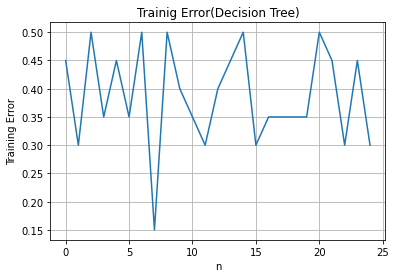

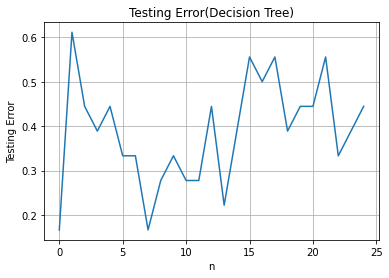

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train,y_train):
  clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
  clf.fit(x_train[ti], y_train[ti])
  y_pred=clf.predict(x_train[tsi])
  scorestr.append(accuracy_score(y_train[tsi], y_pred))
  y_pred=clf.predict(x_test)
  scorests.append(accuracy_score(y_test, y_pred))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Decision Tree)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Decision Tree)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

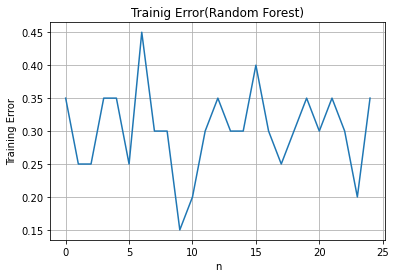

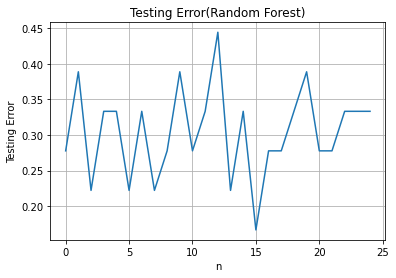

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
y_test=list(y_test)
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train,y_train):
  rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
  rdmfclf.fit(x_train[ti], y_train[ti].reshape(len(ti),))
  y_pred=rdmfclf.predict(x_train[tsi])
  scorestr.append(accuracy_score(y_train[tsi], y_pred))
  y_pred=rdmfclf.predict(x_test)
  scorests.append(accuracy_score(y_test, y_pred))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

In [ ]:
df2=pd.DataFrame(X)
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356
0,0.719022,0.799972,1.116379,0.764488,0.923383,0.961330,0.558784,1.043538,2.035055,2.412407,1.020116,0.924422,0.411267,0.650088,0.555744,0.554543,2.877468,2.251094,2.765226,1.270153,1.197197,0.460204,0.668471,1.115757,0.853759,20.823211,12.842759,10.186025,3.183341,3.603291,3.697479,1.522895,0.377089,1.061575,1.685172,1.210726,1.138643,0.711443,20.567445,20.212346,...,18.456558,19.274612,19.248007,16.827436,19.116202,19.320298,9.572131,9.570068,11.274389,12.935580,12.699997,12.591806,9.572131,9.572131,9.679259,12.911017,12.990983,12.791377,12.691590,9.572131,12.226687,12.990302,12.990959,12.891180,12.791385,12.145931,12.566004,12.775478,12.835125,12.812802,13.020404,12.291794,12.565416,12.688719,12.852414,11.667012,12.174392,12.512038,10.399852,11.287784
1,2.572195,2.358573,3.817571,2.544322,1.777028,1.908791,0.716344,3.693454,6.151360,4.426207,2.826211,2.506872,1.352286,0.986218,0.711302,0.710504,4.075968,4.490216,5.209842,5.144497,2.453501,1.342684,1.213666,1.390022,1.063347,17.347059,13.903304,15.428416,9.043351,7.070420,6.247996,2.793974,1.045290,1.244727,1.989387,1.260894,1.189412,2.382547,24.876621,22.071349,...,27.681964,30.274388,28.990351,25.026741,29.288620,29.365402,9.718852,9.718281,10.637300,11.678557,11.012375,10.680334,9.718852,9.718852,9.747912,10.654541,10.680327,10.680328,10.680328,9.718852,10.465386,10.679795,10.680367,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,10.680328,11.486169,10.682952,10.680328,10.680328,11.080315,10.112830,10.391051,10.737137,9.187904,9.791919
2,5.115582,4.459389,5.715812,5.017730,3.644102,3.152490,1.511983,5.075399,7.259941,4.552429,2.268471,2.031172,1.322465,1.022786,1.522687,1.525320,5.151207,5.062471,4.150778,2.916549,2.198392,1.306540,0.957963,1.034741,1.330071,20.172346,15.009085,15.966569,5.793411,5.338131,5.632151,4.311718,2.543007,2.662746,1.228444,1.809276,1.818422,4.705132,21.223444,22.134132,...,16.150828,24.475677,22.107674,20.198222,23.634674,23.165600,7.917213,7.912404,8.883139,9.987368,9.468898,9.213939,7.917213,7.917213,7.952365,9.183067,9.213934,9.213934,9.213934,7.917213,8.924048,9.213560,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.213934,9.685181,9.213934,9.213934,9.213934,9.445984,8.772028,8.985728,9.214482,8.054785,8.523733
3,0.509786,0.649587,1.357004,0.584740,0.878721,0.927881,0.002060,1.601084,2.431932,2.139452,0.971898,1.070565,0.634705,0.125983,0.001367,0.001229,2.210642,2.152020,2.268938,1.991877,1.592787,0.676388,0.371480,0.177228,0.091759,12.951422,8.423454,6.669177,2.495540,1.961912,2.005421,1.569623,0.675735,0.975794,0.505696,1.093725,1.047559,0.465532,20.586835,21.068474,...,16.785243,17.156677,16.683811,14.877937,16.722553,16.800944,8.425410,8.423881,9.312998,10.345126,10.103128,9.977870,8.425410,8.425410,8.471533,9.945200,9.984425,9.984426,9.984426,8.425410,9.635902,9.983663,9.984426,9.984426,9.977869,9.984426,9.984426,9.984426,9.984426,9.984426,10.281640,9.984426,9.984426,9.977869,10.129921,9.474487,9.726133,9.926839,8.654893,9.182062
4,0.600234,1.078375,1.584306,0.753628,1.811034,2.033962,0.332660,1.851805,3.144972,3.733844,2.330140,3.008399,0.967045,0.606373,0.328647,0.328080,3.187606,2.727223,5.767491,6.425890,6.443947,0.807959,0.807527,0.490327,0.387966,9.705484,7.695050,6.489703,4.324101,5.530998,7.122308,3.181993,2.170939,0.780239,0.481825,0.481873,0.809099,0.590865,11.900142,13.083758,...,26.309828,33.316699,29.036056,27.236831,30.983271,30.627263,10.491803,10.491053,11.345654,12.290508,11.533414,11.156565,10.481147,10.491803,10.510888,11.138133,11.156557,11.156557,11.156557,10.491803,11.007949,11.156123,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.156557,11.919070,11.156557,11.156557,11.156557,11.543451,10.

In [ ]:
mn2=[]
std2=[]
for i in range(0,357):
  mean=np.mean(np.array(df2[i]))
  std=np.std(np.array(df2[i]))
  mn2.append(mean)
  std2.append(std)
print(mn2)
print(std2)


[2.879478463463494, 2.798380539571519, 4.678336546269584, 3.253127585465134, 2.86614660501283, 2.781171925813426, 1.014789979609927, 5.495714931877402, 6.854278138174216, 4.691441303757059, 3.066638583984233, 3.032655200493841, 1.9640573152470788, 1.3754962981718473, 1.1098625270174511, 1.097716307862206, 4.949258716625505, 4.513142145728291, 4.434803243935672, 4.214429004892388, 3.5787117962819663, 2.0676485815147334, 1.5513885511770558, 1.4303810487604904, 1.2669425925686564, 18.270223648587724, 16.27653886982014, 14.217112833668892, 6.663937785368113, 5.659682459174494, 5.366147863754425, 4.855361857638649, 2.77643994519049, 2.067958814237624, 1.656235635698744, 1.69111974123246, 1.4134268086969675, 2.5295833440155935, 21.001455423482973, 23.16731108439379, 26.76349123713807, 18.282041048947306, 21.369124835155652, 15.591643450968162, 9.46753022855668, 8.267111850508185, 6.172072998445741, 4.879956522050721, 4.257904265512979, 2.957228073572501, 2.1370024178963125, 1.752530584009501

In [ ]:
yt2=[]
for i in range(0,357):
  y=[]
  for j in range(0,118):
    if(df2.iloc[j,i]>mn2[i]+std2[i]):
      y.append(1)
    elif (df2.iloc[j,i]<mn2[i]-std2[i]):
      y.append(-1)
    else :
      y.append(0)
  yt2.append(y)
yt2=np.array(yt2)
yt2.shape

(357, 118)

In [ ]:
Xt2=[]
ytr2=[]
for i in range(0,357):
  for j in range(0,118):
    ytr2.append(yt2[i][j])
    x=[]
    for k in range(0,357):
      if(k!=i):x.append(yt2[k][j])
    Xt2.append(x)
Xt2=np.array(Xt2)
print(Xt2.shape)
ytr2=np.array(ytr2)
print(ytr2.shape)


(42126, 356)
(42126,)


In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(Xt2, ytr2, test_size=0.25, stratify=ytr2)
print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)



(31594, 356)
(31594,)
(10532, 356)
(10532,)


In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
clf.fit(x_train2, y_train2)
y_pred2=clf.predict(x_test2)
accuracy_score(y_test2, y_pred2)

0.7136346372958602

In [ ]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
rdmfclf.fit(x_train2, y_train2)
y_pred2=rdmfclf.predict(x_test2)
accuracy_score(y_test2, y_pred2)

0.7200911507785795

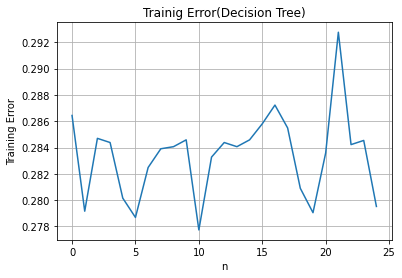

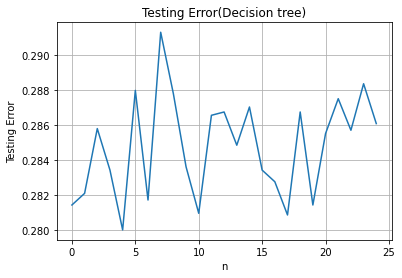

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train2,y_train2):
  clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
  clf.fit(x_train2[ti], y_train2[ti])
  y_pred2=clf.predict(x_train2[tsi])
  scorestr.append(accuracy_score(y_train2[tsi], y_pred2))
  y_pred2=clf.predict(x_test2)
  scorests.append(accuracy_score(y_test2, y_pred2))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Decision Tree)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Decision tree)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

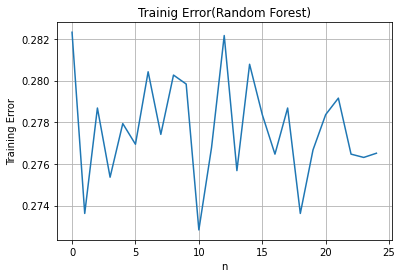

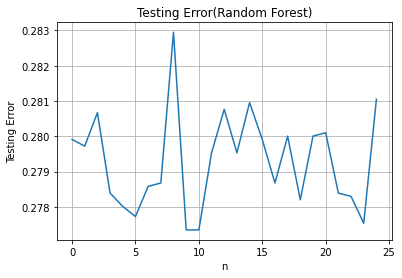

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
scorestr=[]
scorests=[]
val = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
for ti,tsi in val.split(x_train2,y_train2):
  rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
  rdmfclf.fit(x_train2[ti], y_train2[ti])
  y_pred2=rdmfclf.predict(x_train2[tsi])
  scorestr.append(accuracy_score(y_train2[tsi], y_pred2))
  y_pred2=rdmfclf.predict(x_test2)
  scorests.append(accuracy_score(y_test2, y_pred2))

fig = plt.figure()
plt.plot(1-np.array(scorestr))
plt.title("Trainig Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Training Error")
plt.grid()

fig = plt.figure()
plt.plot(1-np.array(scorests))
plt.title("Testing Error(Random Forest)")
plt.xlabel("n")
plt.ylabel("Testing Error")
plt.grid()

<h1><b>Problem 2</b></h1>

Name : Swapnanil Halder
Roll NO. : 18MA20046

In [ ]:
import numpy as np
import pandas as pd
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [ ]:
X.shape

(70000, 784)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [ ]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

In [ ]:
np.unique(y_test, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([1726, 1969, 1748, 1785, 1706, 1578, 1719, 1823, 1706, 1740]))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=20,random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8756571428571429

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=50,random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.8759428571428571

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import numpy as np
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,random_state = 0)
val = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=val, n_jobs=-1)

In [ ]:
print(np.mean(scores))
print(np.std(scores))

0.8701428571428572
0.0031075943842694283


In [ ]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
rdmfclf.fit(x_train, y_train)
y_pred=rdmfclf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9381714285714285

In [ ]:
rdmfclf = ensemble.RandomForestClassifier(n_estimators=20,max_depth=10)
val = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
scores = cross_val_score(rdmfclf, X, y, scoring='accuracy', cv=val, n_jobs=-1)

In [ ]:
print(np.mean(scores))
print(np.std(scores))

0.9371142857142857
0.0032474793993156436
